## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_tests = mouse_metadata.merge(study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_tests.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_tests['Mouse ID'].count()


1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_tests['Mouse ID'].value_counts()
print(duplicate_mice)


g989    13
b559    10
e476    10
k483    10
o562    10
        ..
o848     1
x226     1
x336     1
l872     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_test_x = mouse_tests.loc[mouse_tests['Mouse ID'].duplicated(keep='last')]
mouse_test_x


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_test_y = mouse_tests.drop_duplicates(subset='Mouse ID', keep='last')
mouse_test_y


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_test_y['Mouse ID'].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = mouse_test_y.groupby('Drug Regimen').mean()
tumor_mean = mean['Tumor Volume (mm3)']
median = mouse_test_y.groupby('Drug Regimen').median()
tumor_median = median['Tumor Volume (mm3)']
var = mouse_test_y.groupby('Drug Regimen').var()
tumor_var = var['Tumor Volume (mm3)']
std = mouse_test_y.groupby('Drug Regimen').std()
tumor_std = std['Tumor Volume (mm3)'].std()
sems = sem(tumor_mean)




# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
describe = mouse_test_y.groupby('Drug Regimen').describe()
describe['Tumor Volume (mm3)']

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,25.0,36.667568,5.715188,23.343598,32.377357,38.125164,40.159220,47.685963
Ceftamin,25.0,57.753977,8.365568,45.000000,48.722078,59.851956,64.299830,68.923185
Infubinol,25.0,58.178246,8.602957,36.321346,54.048608,60.165180,65.525743,72.226731
Ketapril,25.0,62.806191,9.945920,45.000000,56.720095,64.487812,69.872251,78.567014
Naftisol,25.0,61.205757,10.297083,45.000000,52.079510,63.283288,69.563621,76.668817
Placebo,25.0,60.508414,8.874672,45.000000,52.942902,62.030594,68.134288,73.212939
Propriva,25.0,56.736964,8.327605,45.000000,49.122969,55.841410,62.570880,72.455421
Ramicane,25.0,36.191390,5.671539,22.050126,31.560470,36.561652,40.659006,45.220869
Stelasyn,24.0,61.001707,9.504293,45.000000,52.476596,62.192350,69.103944,75.123690


In [20]:
mouse_test_y.groupby('Drug Regimen').agg(
    {
        'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
    })

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane              36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

## Bar and Pie Charts

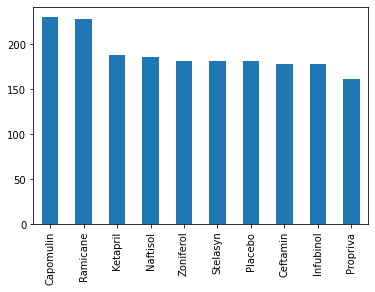

In [41]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_test_x['Drug Regimen'].value_counts()
mouse_tests['Drug Regimen'].value_counts().plot.bar()

<BarContainer object of 10 artists>

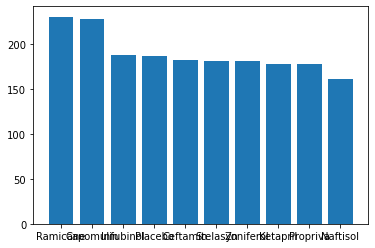

In [49]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x = mouse_tests['Drug Regimen'].unique()
y = mouse_tests['Drug Regimen'].value_counts()
x
plt.bar(x, y)



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
